In [1]:
from google.colab import files
uploaded = files.upload()


Saving AmesHousing.csv to AmesHousing.csv


In [2]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [3]:
# STEP 2: Load the dataset
df = pd.read_csv("AmesHousing.csv")  # Replace with your actual filename
print("Original dataset shape:", df.shape)


Original dataset shape: (2930, 82)


In [4]:
# STEP 3: Fill missing values
# Fill numeric columns with mean
df.fillna(df.mean(numeric_only=True), inplace=True)


In [6]:
# Fill object (categorical) columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])



In [7]:
# STEP 4: Drop columns with only one unique value (not useful for modeling)
for col in df.columns:
    if df[col].nunique() == 1:
        df.drop(col, axis=1, inplace=True)


In [8]:
# STEP 5: Encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)


In [9]:
# STEP 6: Check again dataset size
print("Shape after encoding:", df_encoded.shape)


Shape after encoding: (2930, 263)


In [10]:
# STEP 7: Define X and y
if 'SalePrice' in df_encoded.columns:
    X = df_encoded.drop('SalePrice', axis=1)
    y = df_encoded['SalePrice']
else:
    raise ValueError("SalePrice column not found in dataset!")


In [11]:
# STEP 8: Make sure we have enough rows
if len(X) <= 1:
    raise ValueError("❌ Not enough data to split. Please check dataset or cleaning steps.")


In [13]:
# STEP 9: Split and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [14]:
# STEP 10: Evaluate
print("✅ R2 Score:", r2_score(y_test, y_pred))
print("✅ Mean Squared Error:", mean_squared_error(y_test, y_pred))


✅ R2 Score: 0.837790454982797
✅ Mean Squared Error: 1300522802.026165


In [15]:
print("✅ Model Performance Summary")
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Training Data Size:", X_train.shape)
print("Testing Data Size:", X_test.shape)


✅ Model Performance Summary
R2 Score: 0.837790454982797
Mean Squared Error: 1300522802.026165
Training Data Size: (2344, 262)
Testing Data Size: (586, 262)


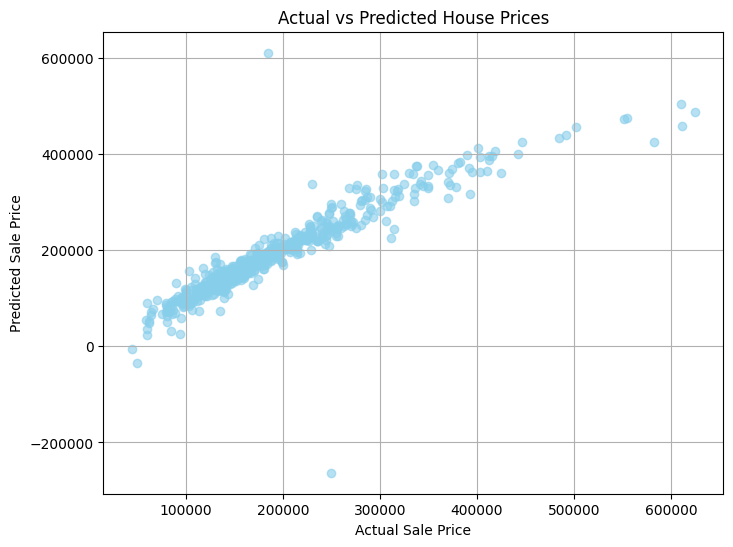

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='skyblue')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


In [17]:
comparison_df = pd.DataFrame({
    'Actual Price': y_test.values[:5],
    'Predicted Price': y_pred[:5]
})
print("\n📊 First 5 Predictions:")
print(comparison_df)



📊 First 5 Predictions:
   Actual Price  Predicted Price
0        161000    155542.926903
1        116000    110097.071080
2        196500    200432.145412
3        123600    129594.168356
4        126000    130835.773744
